In [31]:
########
##MCMC##
########
'''
this program will help to find the convergence rate of MCMC, in term of magnetic moment
author: Hao SUN
email: sunhopht@gmail.com
'''

import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
random.seed(123)#for duplication





now = datetime.datetime.now()
#the start time

I =16
J =16
#I,J  are the shape of the simulated optical lattice

A = np.empty((I,J))
for i in range(I):
    for j in range(J):
        A[i,j]= 1
        
        
JKBTMAX = 5 #range of temperature 
Steplen = 0.01 # step length


T = int(JKBTMAX/Steplen) #the number of temperature 
M = np.empty((10,T))#the average magnetic moment for every 10 percent result of each T
for i in range(10):
    for t in range(T):
        M[i,t] = 0


cycle = 1000 #cycle times for each point on average




ii = range(T)
ii = np.asarray(ii)
T_ =(ii[:]*Steplen)
Onsager= I*J*(1-np.sinh(2/T_)**(-4))**0.125
for i in range(len(Onsager)):
    if np.isnan(Onsager[i]):
        Onsager[i]=0

#this is the Onsager solution

W =I*J*cycle #total cycle times for each T
Error_in_step = np.zeros((T,W))#to calculate the error in each cycle
for jkbt in range(T):
    Temp = jkbt
    #Temp = T -1 - JKBT
    for w in range(W):
        i = int(np.round((I-1)*random.uniform(0,1)))
        j = int(np.round((J-1)*random.uniform(0,1)))
        A[i,j]=-A[i,j]
        if i==0:
            im=I-1
        else:
            im=i-1
        if i==I-1:
            ip=0
        else:
            ip=i+1
        if j==0:
            jm=J-1
        else:
            jm=j-1
        if j==J-1:
            jp=0
        else:
            jp=j+1
        
        
        dE =-2* (A[i,j]*A[ip,j]+A[i,j]*A[i,jp]+A[i,j]*A[im,j]+A[i,j]*A[i,jm])
        if dE<0:
            A[i,j] = A[i,j]
        else:
            if np.exp(-dE/(Temp*Steplen))<random.uniform(0,1):
                A[i,j] = -A[i,j]
                
        M[np.floor((w)*10/W),jkbt]+= np.sum(A)
        
        Error_in_step[jkbt,w] += np.abs( np.abs(np.sum(A)) - Onsager[jkbt])
    M[:,jkbt] /= (W/10)
    #Error_in_step[jkbt,np.floor((w)*cycle/W)] /= (W/cycle)
end = datetime.datetime.now()
print("time:",(end-now).total_seconds())



/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:52: RuntimeWarning: divide by zero encountered in true_divide
/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:52: RuntimeWarning: invalid value encountered in power
/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:90: RuntimeWarning: divide by zero encountered in double_scalars
/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:93: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


time: 4191.347122


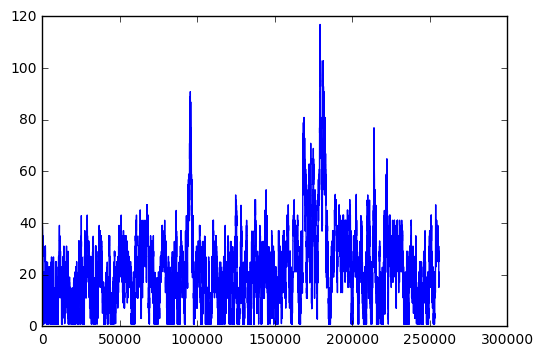

In [30]:
plt.plot(Error_in_step[22,:])
plt.show()

In [9]:
np.mean(Error_in_step)

26.48051965945697

In [32]:
np.save('/Users/sunhop/Desktop/HMC_MCMC/MCMC_Error_pr_0.01', Error_in_step)

/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide
/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in power


Error: 784.724736567


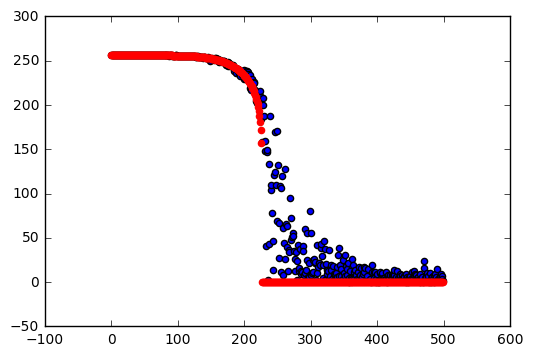

Error: 823.705416707


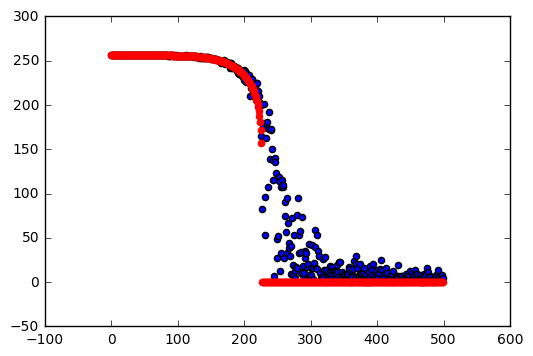

Error: 841.592609995


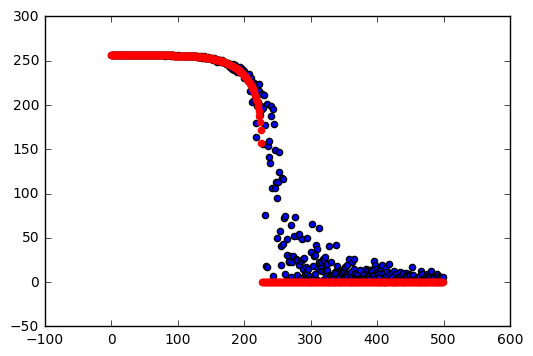

Error: 859.160447019


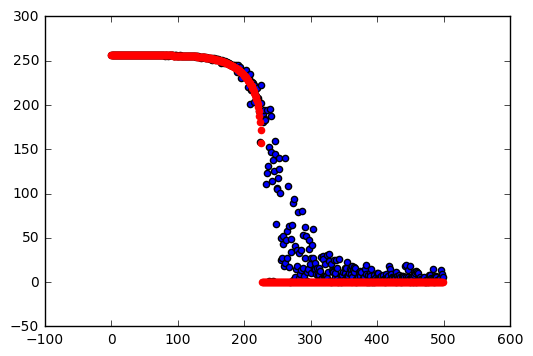

Error: 859.584999507


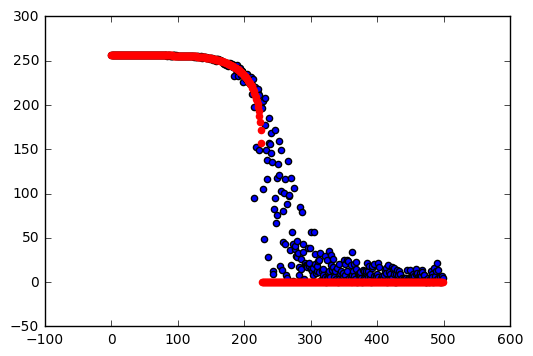

Error: 832.917592521


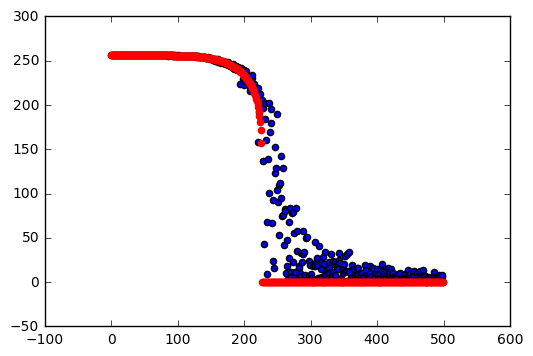

Error: 865.211685939


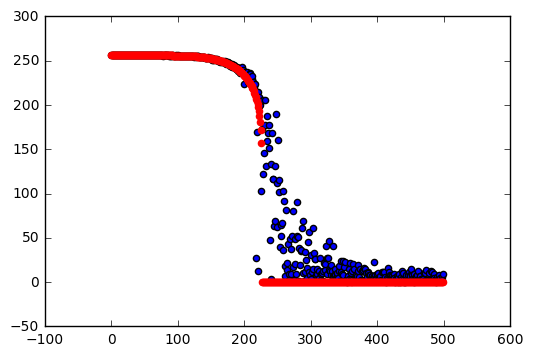

Error: 837.408929474


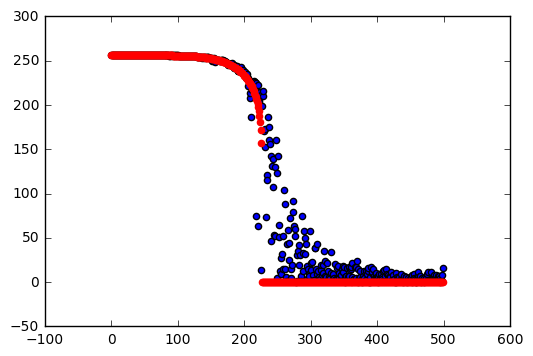

Error: 752.861630219


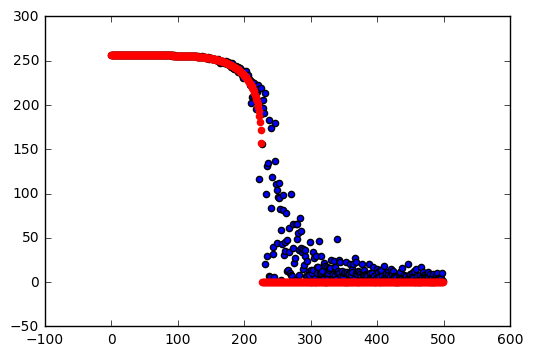

Error: 810.86301396


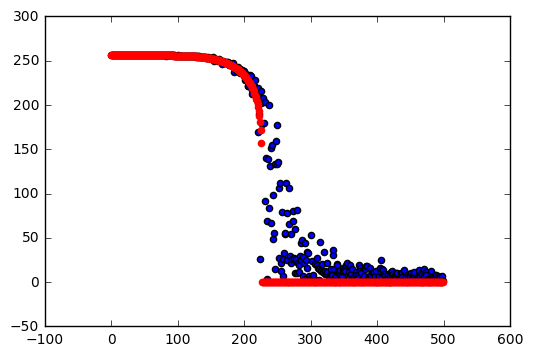

Err_mean : 826.803106191


In [35]:
ii = range(T)
ii = np.asarray(ii)
T_ =(ii[:]*Steplen)
Onsager= I*J*(1-np.sinh(2/T_)**(-4))**0.125
for i in range(len(Onsager)):
    if np.isnan(Onsager[i]):
        Onsager[i]=0
Err_sum = 0
for i in range(10):
    print("Error:",np.sqrt(np.sum((np.abs(M[i,:]) - np.abs(Onsager))**2)))
    Err_sum += np.sqrt(np.sum((np.abs(M[i,:]) - np.abs(Onsager))**2))
    plt.scatter(ii,np.abs(M[i,:]))
    plt.scatter(ii,Onsager,color='red')
    plt.show()
    

print("Err_mean :",Err_sum/10)